# Tentando entender o quão ruim é um filtro Passa-baixas retangular na FREQUENCIA


Essencialmente, o que acontece é que a gente pega uma janela retangular e aplica no sinc no dominio do tempo. Mas o que acontece se aplicar uma retangular na frequência?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

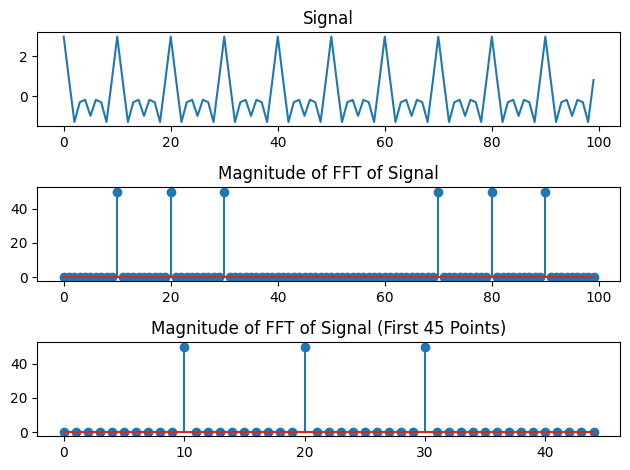

In [3]:
n = np.arange(0,100,1)
sinal = np.cos(2*np.pi*0.1*n) + np.cos(2*np.pi*0.2*n) + np.cos(2*np.pi*0.3*n)

plt.subplot(311)
plt.title('Signal')
plt.plot(sinal)

plt.subplot(312)
plt.title('Magnitude of FFT of Signal')
plt.stem(np.abs(np.fft.fft(sinal)))
plt.subplot(313)
plt.title('Magnitude of FFT of Signal (First 45 Points)')
plt.stem(np.abs(np.fft.fft(sinal))[:45])

plt.tight_layout()
# 10/100 = 0.1 -> Exatamente como esperávamos -> em termos de frequência

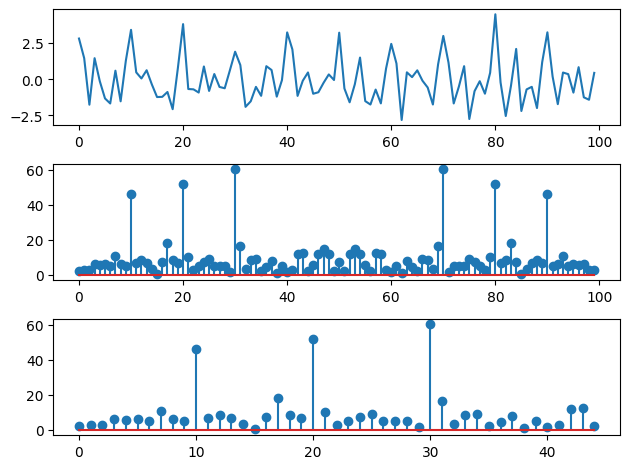

In [4]:
noisy_signal = sinal + 0.8*np.random.randn(100)

plt.subplot(311)
plt.plot(noisy_signal)

plt.subplot(312)
plt.stem(np.abs(np.fft.fft(noisy_signal)))

plt.subplot(313)
plt.stem(np.abs(np.fft.fft(noisy_signal))[:45])
plt.tight_layout()


C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

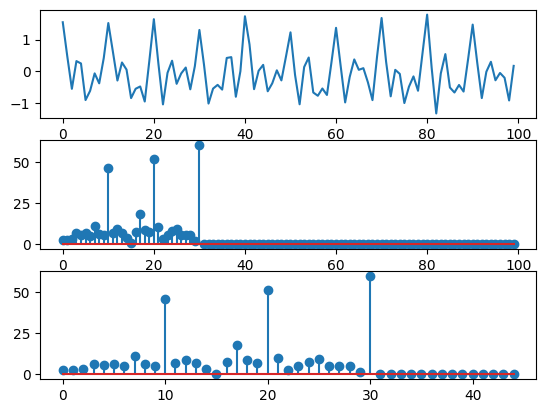

In [5]:
sinal_fft = np.fft.fft(noisy_signal)
sinal_fft[31:] = 0
filtered_signal = np.fft.ifft(sinal_fft)

plt.subplot(311)
plt.plot(filtered_signal)

plt.subplot(312)
plt.stem(np.abs(np.fft.fft(filtered_signal)))

plt.subplot(313)
plt.stem(np.abs(np.fft.fft(filtered_signal))[:45])



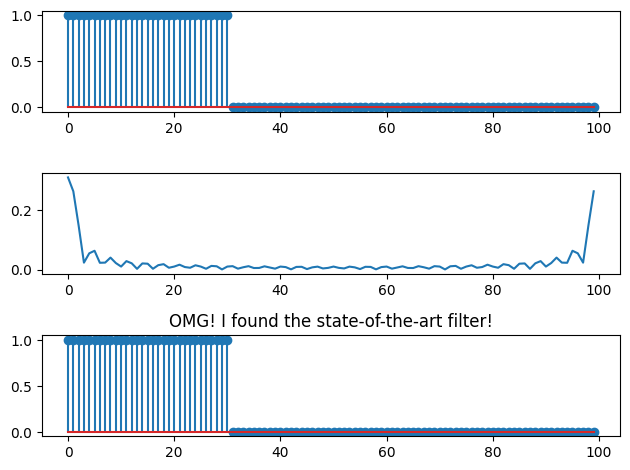

In [6]:
square_filter = np.ones(len(sinal))
square_filter[31:] = 0

plt.subplot(311)
plt.stem(square_filter)

plt.subplot(312)
plt.plot(np.abs(np.fft.ifft(square_filter)))

filter_ifft = np.fft.ifft(square_filter)

plt.subplot(313)
plt.stem(np.abs(np.fft.fft(filter_ifft)))
plt.title("OMG! I found the state-of-the-art filter!")

plt.tight_layout()

[ 1.04000000e+00+0.00000000e+00j  1.63731435e-01-5.14546765e-03j
 -3.46049579e-01+2.17715941e-02j  1.22093213e-01-1.15412066e-02j
  9.32934220e-02-1.17857000e-02j  5.66544658e-18+8.11769722e-19j
 -7.72110668e-02+1.47287987e-02j -1.97044750e-02+4.40447200e-03j
  6.60316938e-02-1.69540574e-02j -3.26063876e-02+9.47303131e-03j
  3.61803399e-02-1.17557050e-02j -1.32775230e-02+4.78020241e-03j
 -5.18232136e-02+2.05182618e-02j  3.81632950e-02-1.65147325e-02j
  1.69447139e-02-7.97357713e-03j  9.21095806e-18-3.15665375e-19j
 -2.85194668e-02+1.56787096e-02j  3.66839261e-03-2.16948134e-03j
  1.24575267e-02-7.90578684e-03j -9.63730593e-03+6.54950635e-03j
  2.61803399e-02-1.90211303e-02j -2.12880578e-02+1.65127103e-02j
 -1.65275648e-02+1.36727907e-02j  1.97651591e-02-1.74253317e-02j
  5.05667238e-03-4.74853143e-03j -3.04756530e-18+4.15186731e-18j
 -1.34028625e-02+1.42725989e-02j  4.99844828e-03-5.66962667e-03j
 -1.58595119e-03+1.91708567e-03j  1.94573005e-03-2.50842007e-03j
  1.38196601e-02-1.902113

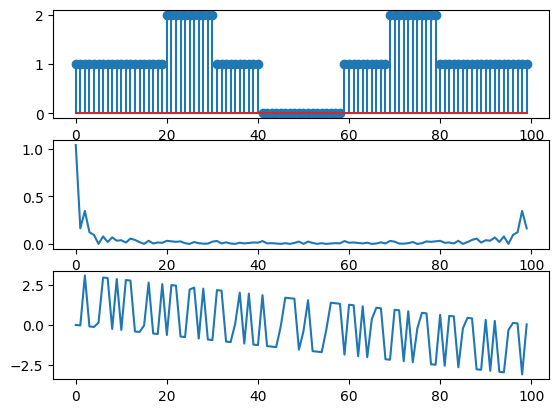

In [7]:
another_filter_example = np.ones(len(sinal))
another_filter_example[41:] = 0
another_filter_example[:20] = 0
another_filter_example += square_filter

another_filter_example = np.fft.ifftshift(np.fft.fftshift(another_filter_example))
another_filter_example[-50:] = another_filter_example[:50][::-1]

plt.subplot(311)
plt.stem(another_filter_example)

plt.subplot(312)
plt.plot(np.abs(np.fft.ifft(another_filter_example)))

print(np.fft.ifft(another_filter_example))

plt.subplot(313)
plt.plot(np.angle(np.fft.ifft(another_filter_example)))


# Plottando janelas e etc

[ 2.55340490e-03 -4.40811377e-03  5.56328962e-03 -5.70789661e-03
  4.69022294e-03 -2.56314778e-03 -4.02291975e-04  3.73963253e-03
 -6.84470103e-03  9.06104104e-03 -9.78075081e-03  8.54526225e-03
 -5.12984856e-03 -4.02447564e-04  7.68745964e-03 -1.60910309e-02
  2.47816557e-02 -3.28350493e-02  3.93558439e-02 -4.35986286e-02
  1.00000000e+00 -4.35986286e-02  3.93558439e-02 -3.28350493e-02
  2.47816557e-02 -1.60910309e-02  7.68745964e-03 -4.02447564e-04
 -5.12984856e-03  8.54526225e-03 -9.78075081e-03  9.06104104e-03
 -6.84470103e-03  3.73963253e-03 -4.02291975e-04 -2.56314778e-03
  4.69022294e-03 -5.70789661e-03  5.56328962e-03 -4.40811377e-03
  2.55340490e-03]


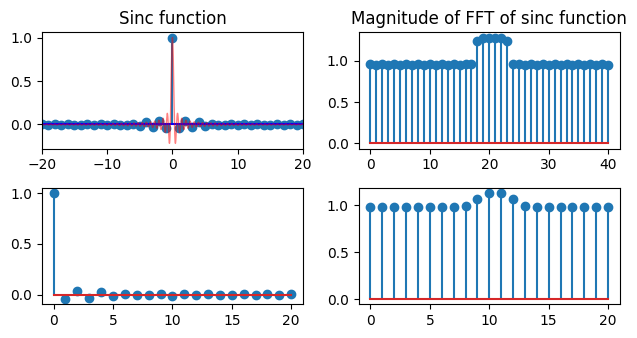

In [9]:
plt.subplot(321)

def plot_sinc(n):
    # Plot sinc stem from -n to n
    h = np.sinc(np.pi * np.arange(-n, n+1, 1))
    plt.stem(np.arange(-n, n+1, 1), h, basefmt='b-')
    # Plot sinc line from -n to n
    plt.plot(np.arange(-n, n, 0.01), np.sinc(np.pi * np.arange(-n, n, 0.01)), 'r-', linewidth=1, alpha=0.5)
    plt.title('Sinc function')
    # Set x limits
    plt.xlim(-n, n)
    return h

h = plot_sinc(20)

print(h)
plt.subplot(322)
plt.stem(np.abs(np.fft.fft(h)))
plt.title('Magnitude of FFT of sinc function')
plt.subplot(323)
# plt.stem(h)

h = h[20:41]
plt.stem(h)


plt.subplot(324)
plt.stem(np.abs(np.fft.fft(h)))

plt.tight_layout()

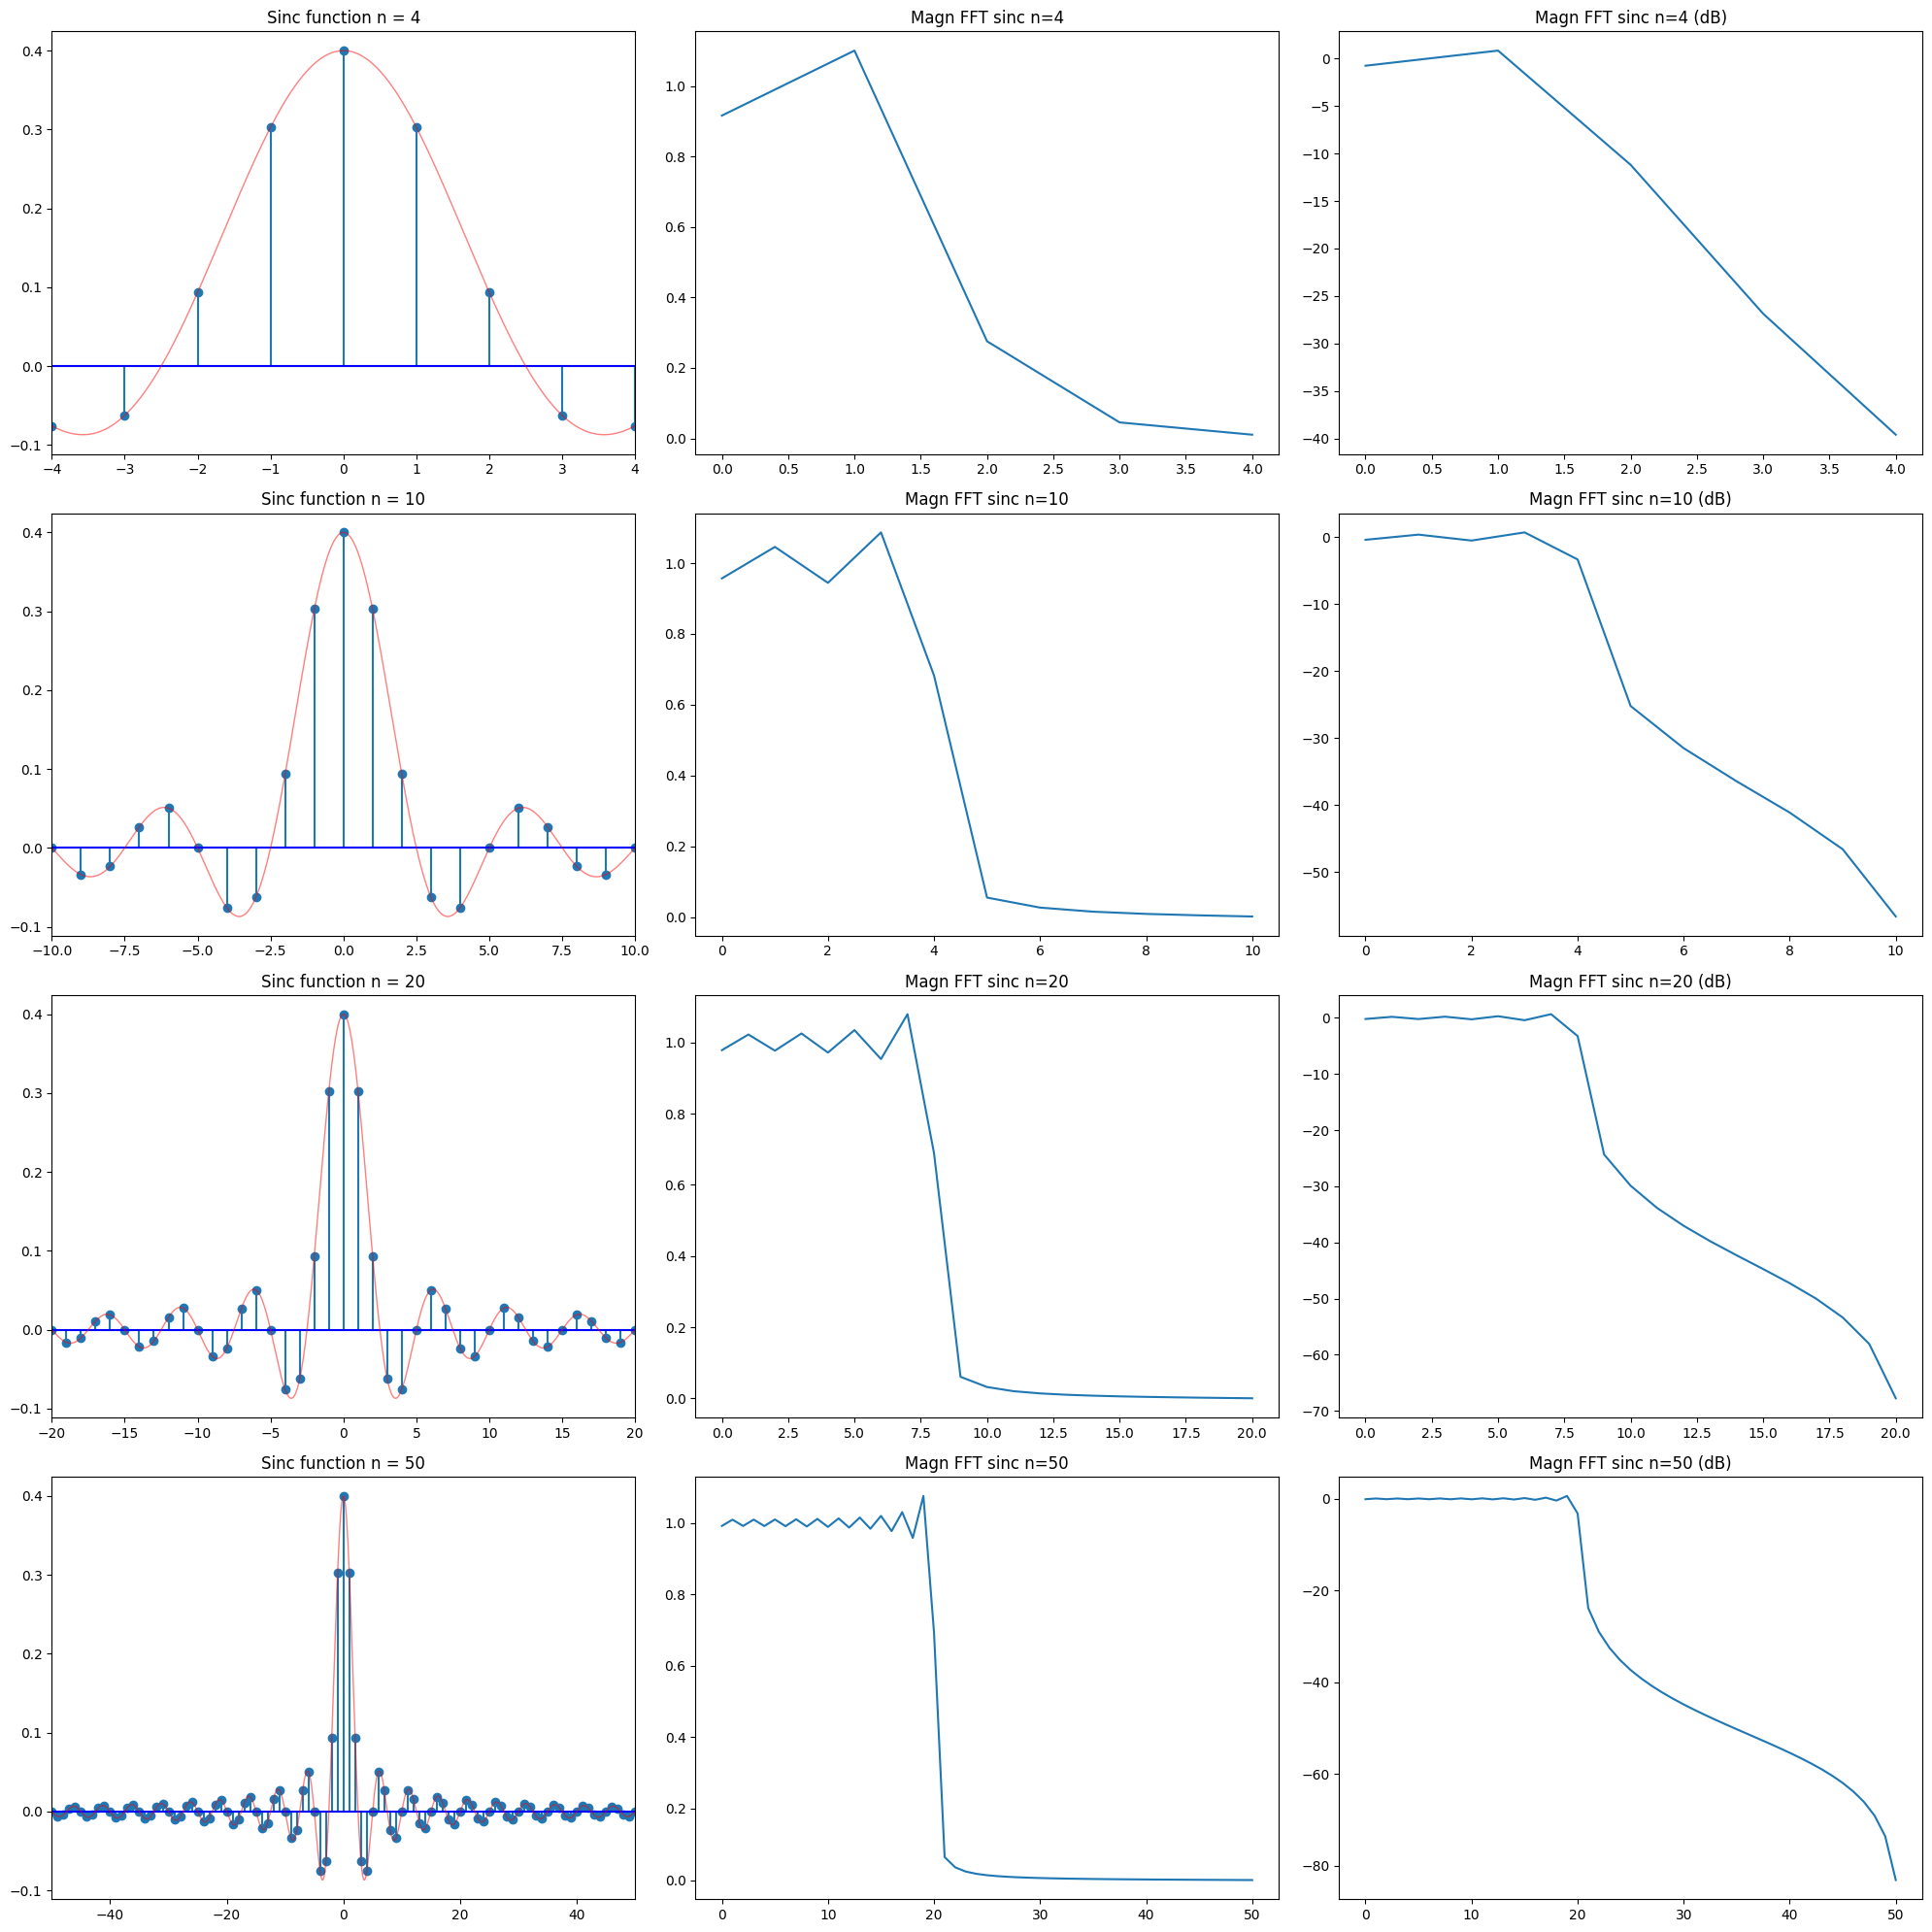

In [46]:
# plt.subplot(321)
n_values = [4, 10, 20, 50]

n = 50
fc = 0.2

plt.figure(figsize=(20, 20))

def plot_sinc(n):
    h = 2 * fc * np.sinc(2 * fc * np.arange(-n, (n+1)))
    plt.stem(np.arange(-n, (n+1)), h, basefmt='b-')
    plt.plot(np.arange(-n, n, 0.01), 2 * fc * np.sinc(2 * fc * np.arange(-n, n, 0.01)), 'r-', linewidth=1, alpha=0.5)
    plt.title('Sinc function n = {}'.format(n))
    plt.xlim(-n, n)
    return h

for i in range(1, 5):
    plt.subplot(len(n_values), 3, 3*i-2)
    h = plot_sinc(n_values[i-1])
    plt.subplot(len(n_values), 3, 3*i - 1)
    plt.plot(np.abs(np.fft.fft(h))[:n_values[i-1]+1])
    plt.title('Magn FFT sinc n={}'.format(n_values[i-1]))
    plt.subplot(len(n_values), 3, 3*i)
    plt.plot(20*np.log10(np.abs(np.fft.fft(h)))[:n_values[i-1]+1])
    plt.title('Magn FFT sinc n={} (dB)'.format(n_values[i-1]))


plt.tight_layout()
plt.show()

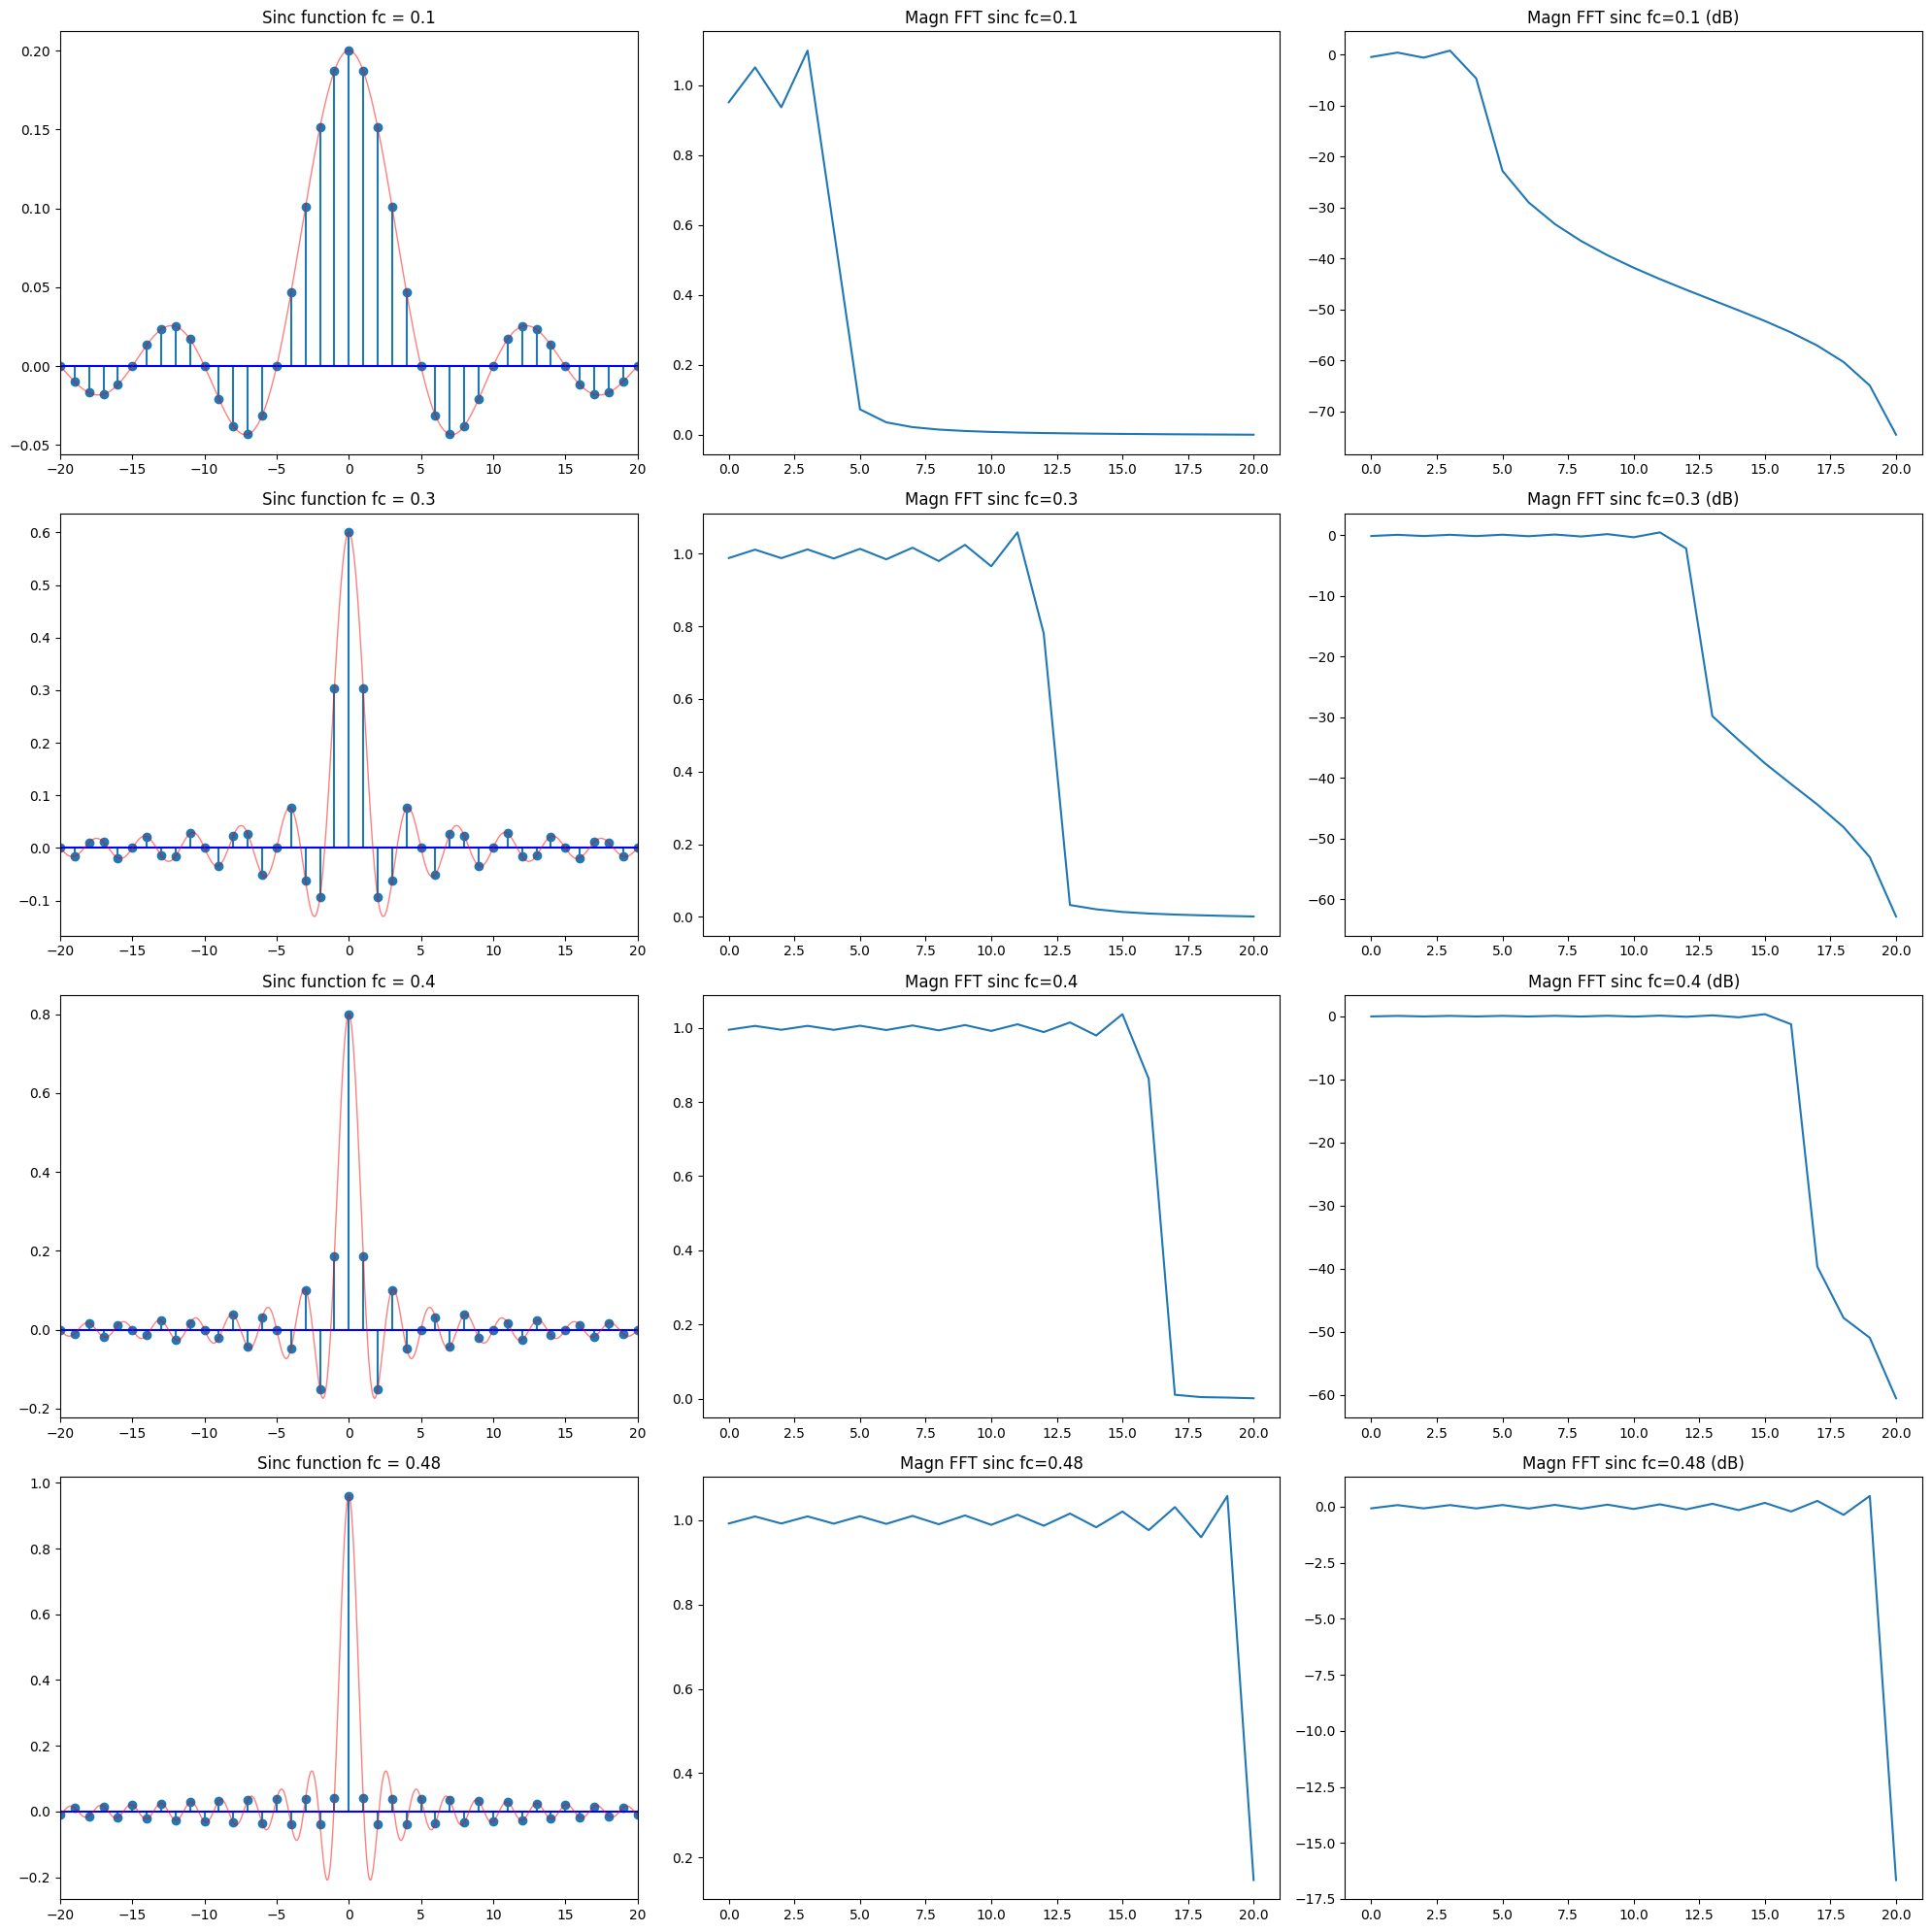

In [45]:
# plt.subplot(321)
fc_values = [0.1, 0.3, 0.4, 0.48]

n = 20

plt.figure(figsize=(20, 20))

def plot_sinc(n=20, fc=0.2):
    h = 2 * fc * np.sinc(2 * fc * np.arange(-n, (n+1)))
    plt.stem(np.arange(-n, (n+1)), h, basefmt='b-')
    plt.plot(np.arange(-n, n, 0.01), 2 * fc * np.sinc(2 * fc * np.arange(-n, n, 0.01)), 'r-', linewidth=1, alpha=0.5)
    plt.title('Sinc function fc = {}'.format(fc))
    plt.xlim(-n, n)
    return h

for i in range(1, 5):
    plt.subplot(len(fc_values), 3, 3*i-2)
    h = plot_sinc(fc=fc_values[i-1])
    plt.subplot(len(n_values), 3, 3*i - 1)
    plt.plot(np.abs(np.fft.fft(h))[:n+1])
    plt.title('Magn FFT sinc fc={}'.format(fc_values[i-1]))
    plt.subplot(len(n_values), 3, 3*i)
    plt.plot(20*np.log10(np.abs(np.fft.fft(h)))[:n+1])
    plt.title('Magn FFT sinc fc={} (dB)'.format(fc_values[i-1]))


plt.tight_layout()
plt.show()

# Testando o Cosseno como oum deslocador

Acredito que se multiplicar por um cosseno talvez funcione

F{cos(wo * n)} = (delta(w - wo) + delta(w + wo))

Text(0.5, 1.0, 'FFT do sinal deslocado')

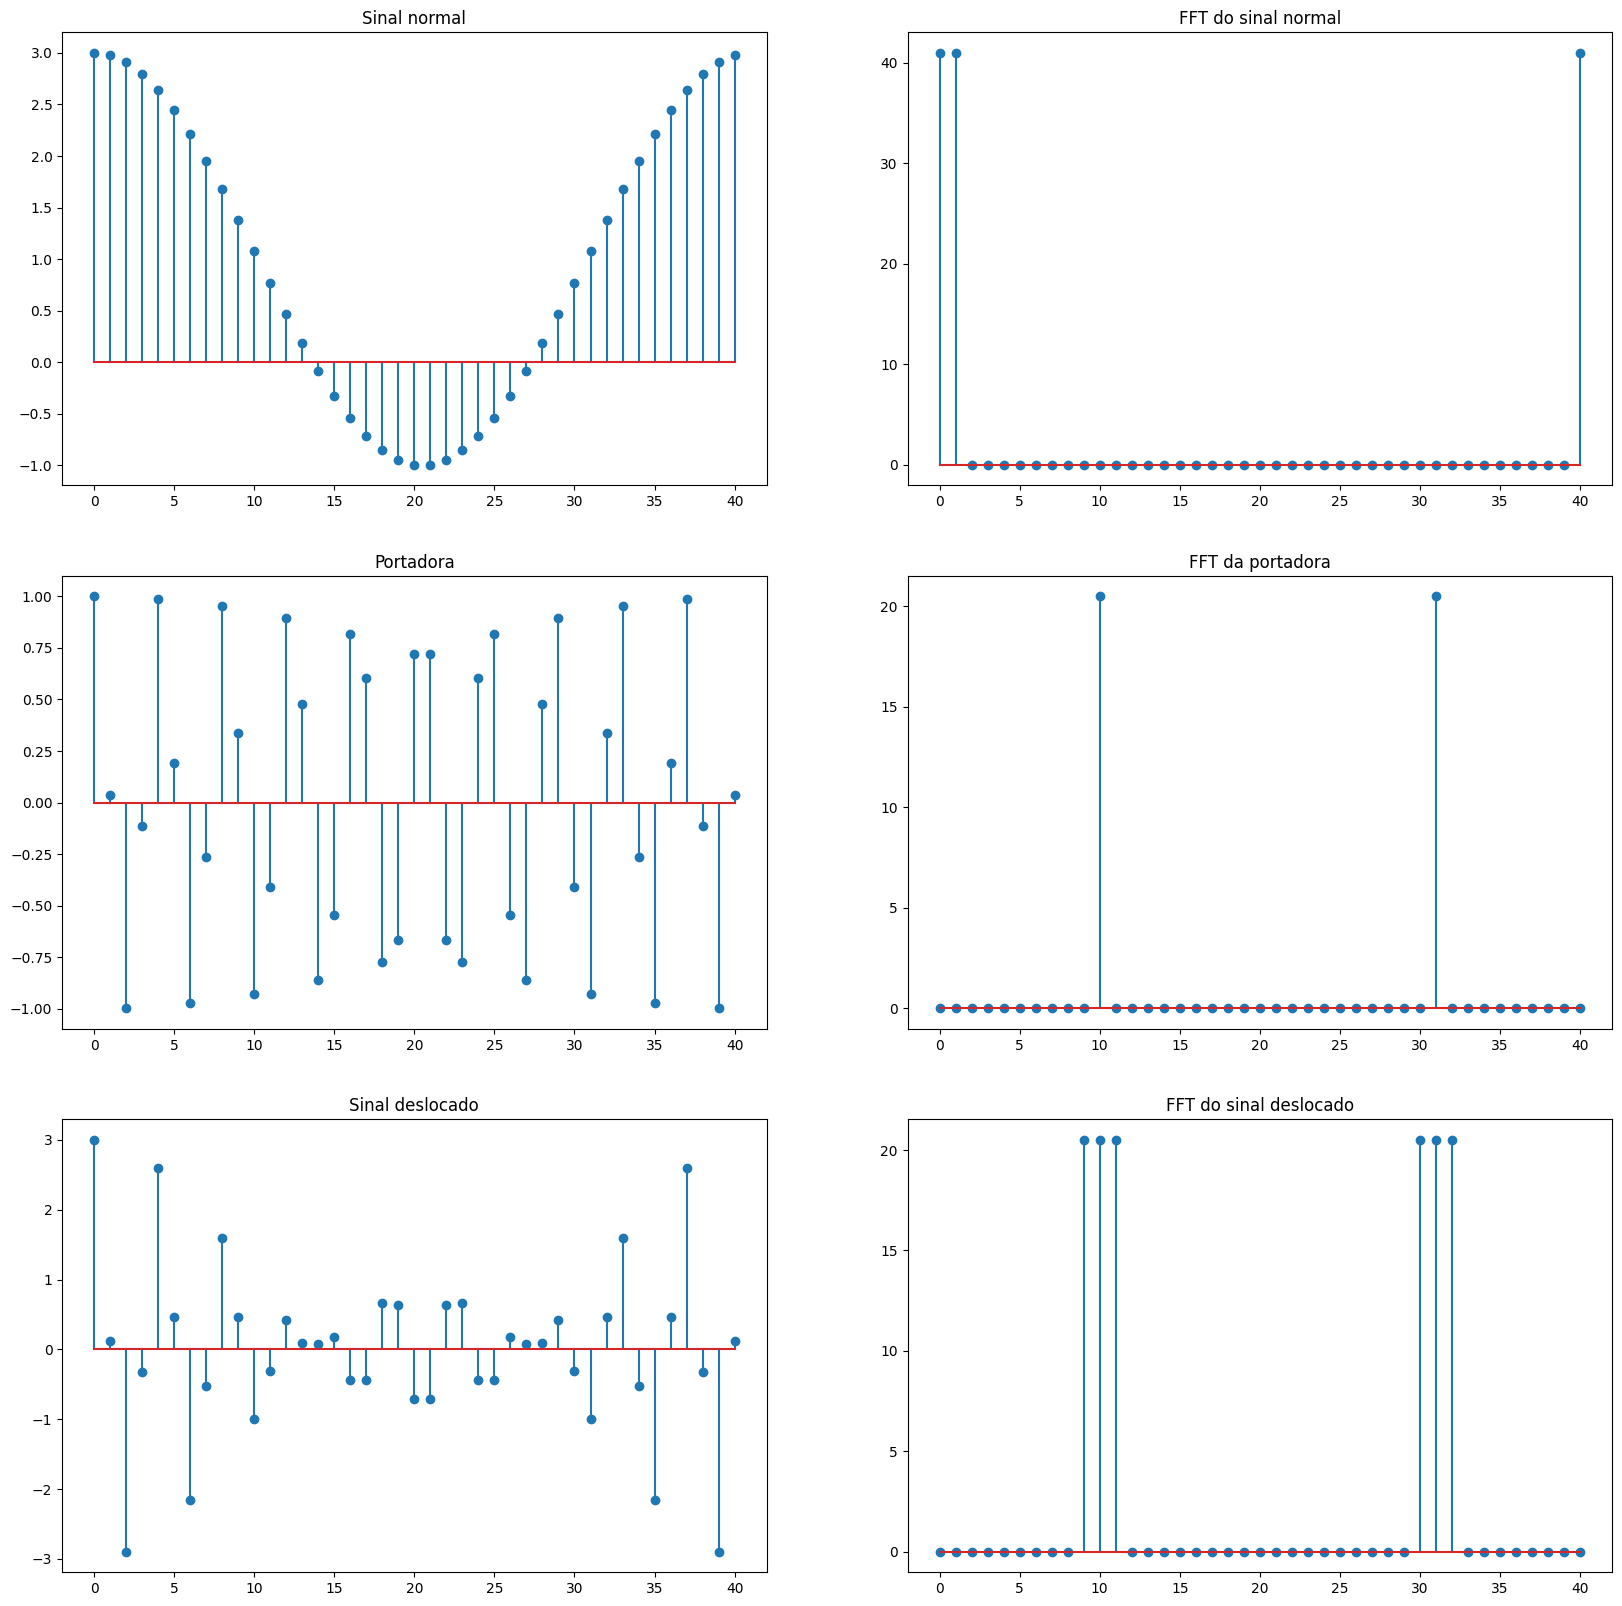

In [56]:
n = 41
teste_tres_picos = np.ones(n) + 2*np.cos((2*np.pi/n)*np.arange(n))

plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.stem(teste_tres_picos)
plt.title("Sinal normal")

plt.subplot(322)
plt.stem(np.abs(np.fft.fft(teste_tres_picos)))
plt.title("FFT do sinal normal")

sinal_deslocado = np.zeros(n)
# eu vou deslocar 10 amostras na frequência

cos_portadora = np.cos(2*np.pi*10*np.arange(n)/n)
sinal_deslocado = teste_tres_picos * cos_portadora

plt.subplot(323)
plt.stem(cos_portadora)
plt.title("Portadora")

plt.subplot(324)
plt.stem(np.abs(np.fft.fft(cos_portadora)))
plt.title("FFT da portadora")


plt.subplot(325)
plt.stem(sinal_deslocado)
plt.title("Sinal deslocado")

plt.subplot(326)
plt.stem(np.abs(np.fft.fft(sinal_deslocado)))
plt.title("FFT do sinal deslocado")



[-0.00480203+0.j  0.01145262+0.j -0.00844174+0.j -0.00060198+0.j
  0.00404243+0.j  0.00433314+0.j -0.01692414+0.j  0.01989517+0.j
 -0.00953263+0.j -0.00147254+0.j -0.00294564+0.j  0.02274714+0.j
 -0.03860316+0.j  0.03201227+0.j -0.00916377+0.j  0.00092783+0.j
 -0.03368582+0.j  0.09754244+0.j -0.145847  +0.j  0.13194884+0.j
 -0.05170371+0.j -0.04852596+0.j  0.10792483+0.j -0.09961924+0.j
  0.048271  +0.j -0.00324232+0.j -0.00516158+0.j -0.01402572+0.j
  0.03013509+0.j -0.02423773+0.j  0.00450671+0.j  0.00778396+0.j
 -0.0026725 +0.j -0.00995011+0.j  0.01388349+0.j -0.00482101+0.j
 -0.00666465+0.j  0.00854291+0.j -0.00067684+0.j -0.00636498+0.j
  0.00412768+0.j]


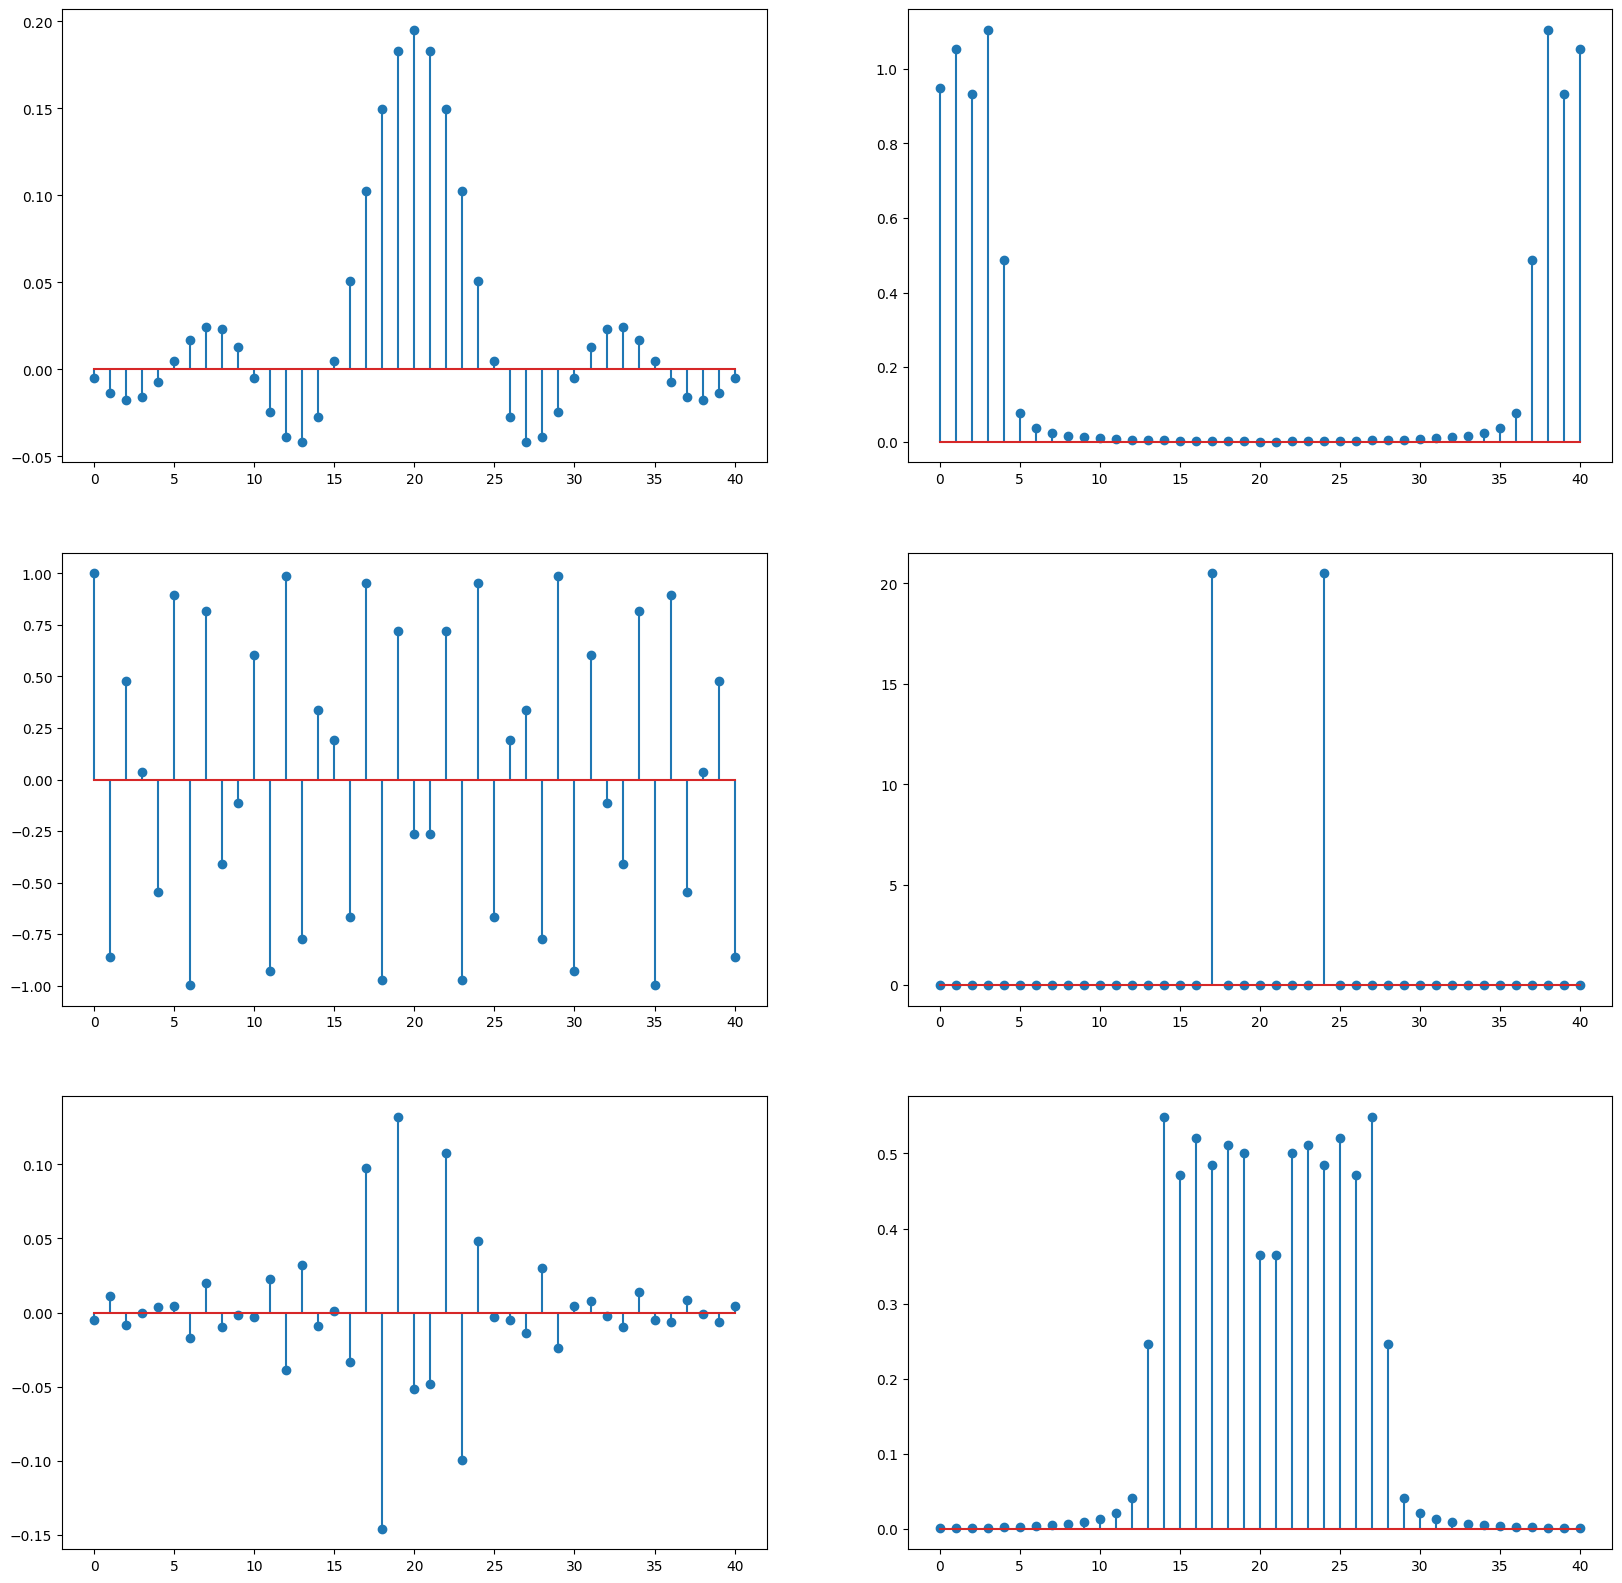

In [74]:
fc = 4

plt.figure(figsize=(20, 20))
# print(np.arange(-n//2+1, n//2 + 1))
filtro_pb = (2 * fc / n) * np.sinc( (2 * fc / n) * np.arange(-n//2+1, n//2 + 1))

plt.subplot(321)
plt.stem(filtro_pb)

plt.subplot(322)
plt.stem(np.abs(np.fft.fft(filtro_pb)))

cos_portadora = np.cos(2*np.pi*17*np.arange(n)/n)

sinal_deslocado = filtro_pb * cos_portadora

plt.subplot(323)
plt.stem(cos_portadora)

plt.subplot(324)
plt.stem(np.abs(np.fft.fft(cos_portadora)))

plt.subplot(325)
plt.stem(sinal_deslocado)

plt.subplot(326)
plt.stem(np.abs(np.fft.fft(sinal_deslocado)))

print(np.fft.ifft(np.fft.fft(sinal_deslocado)))


# Testando diferentes formatos de filtro FIR

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, firwin2, remez, freqz

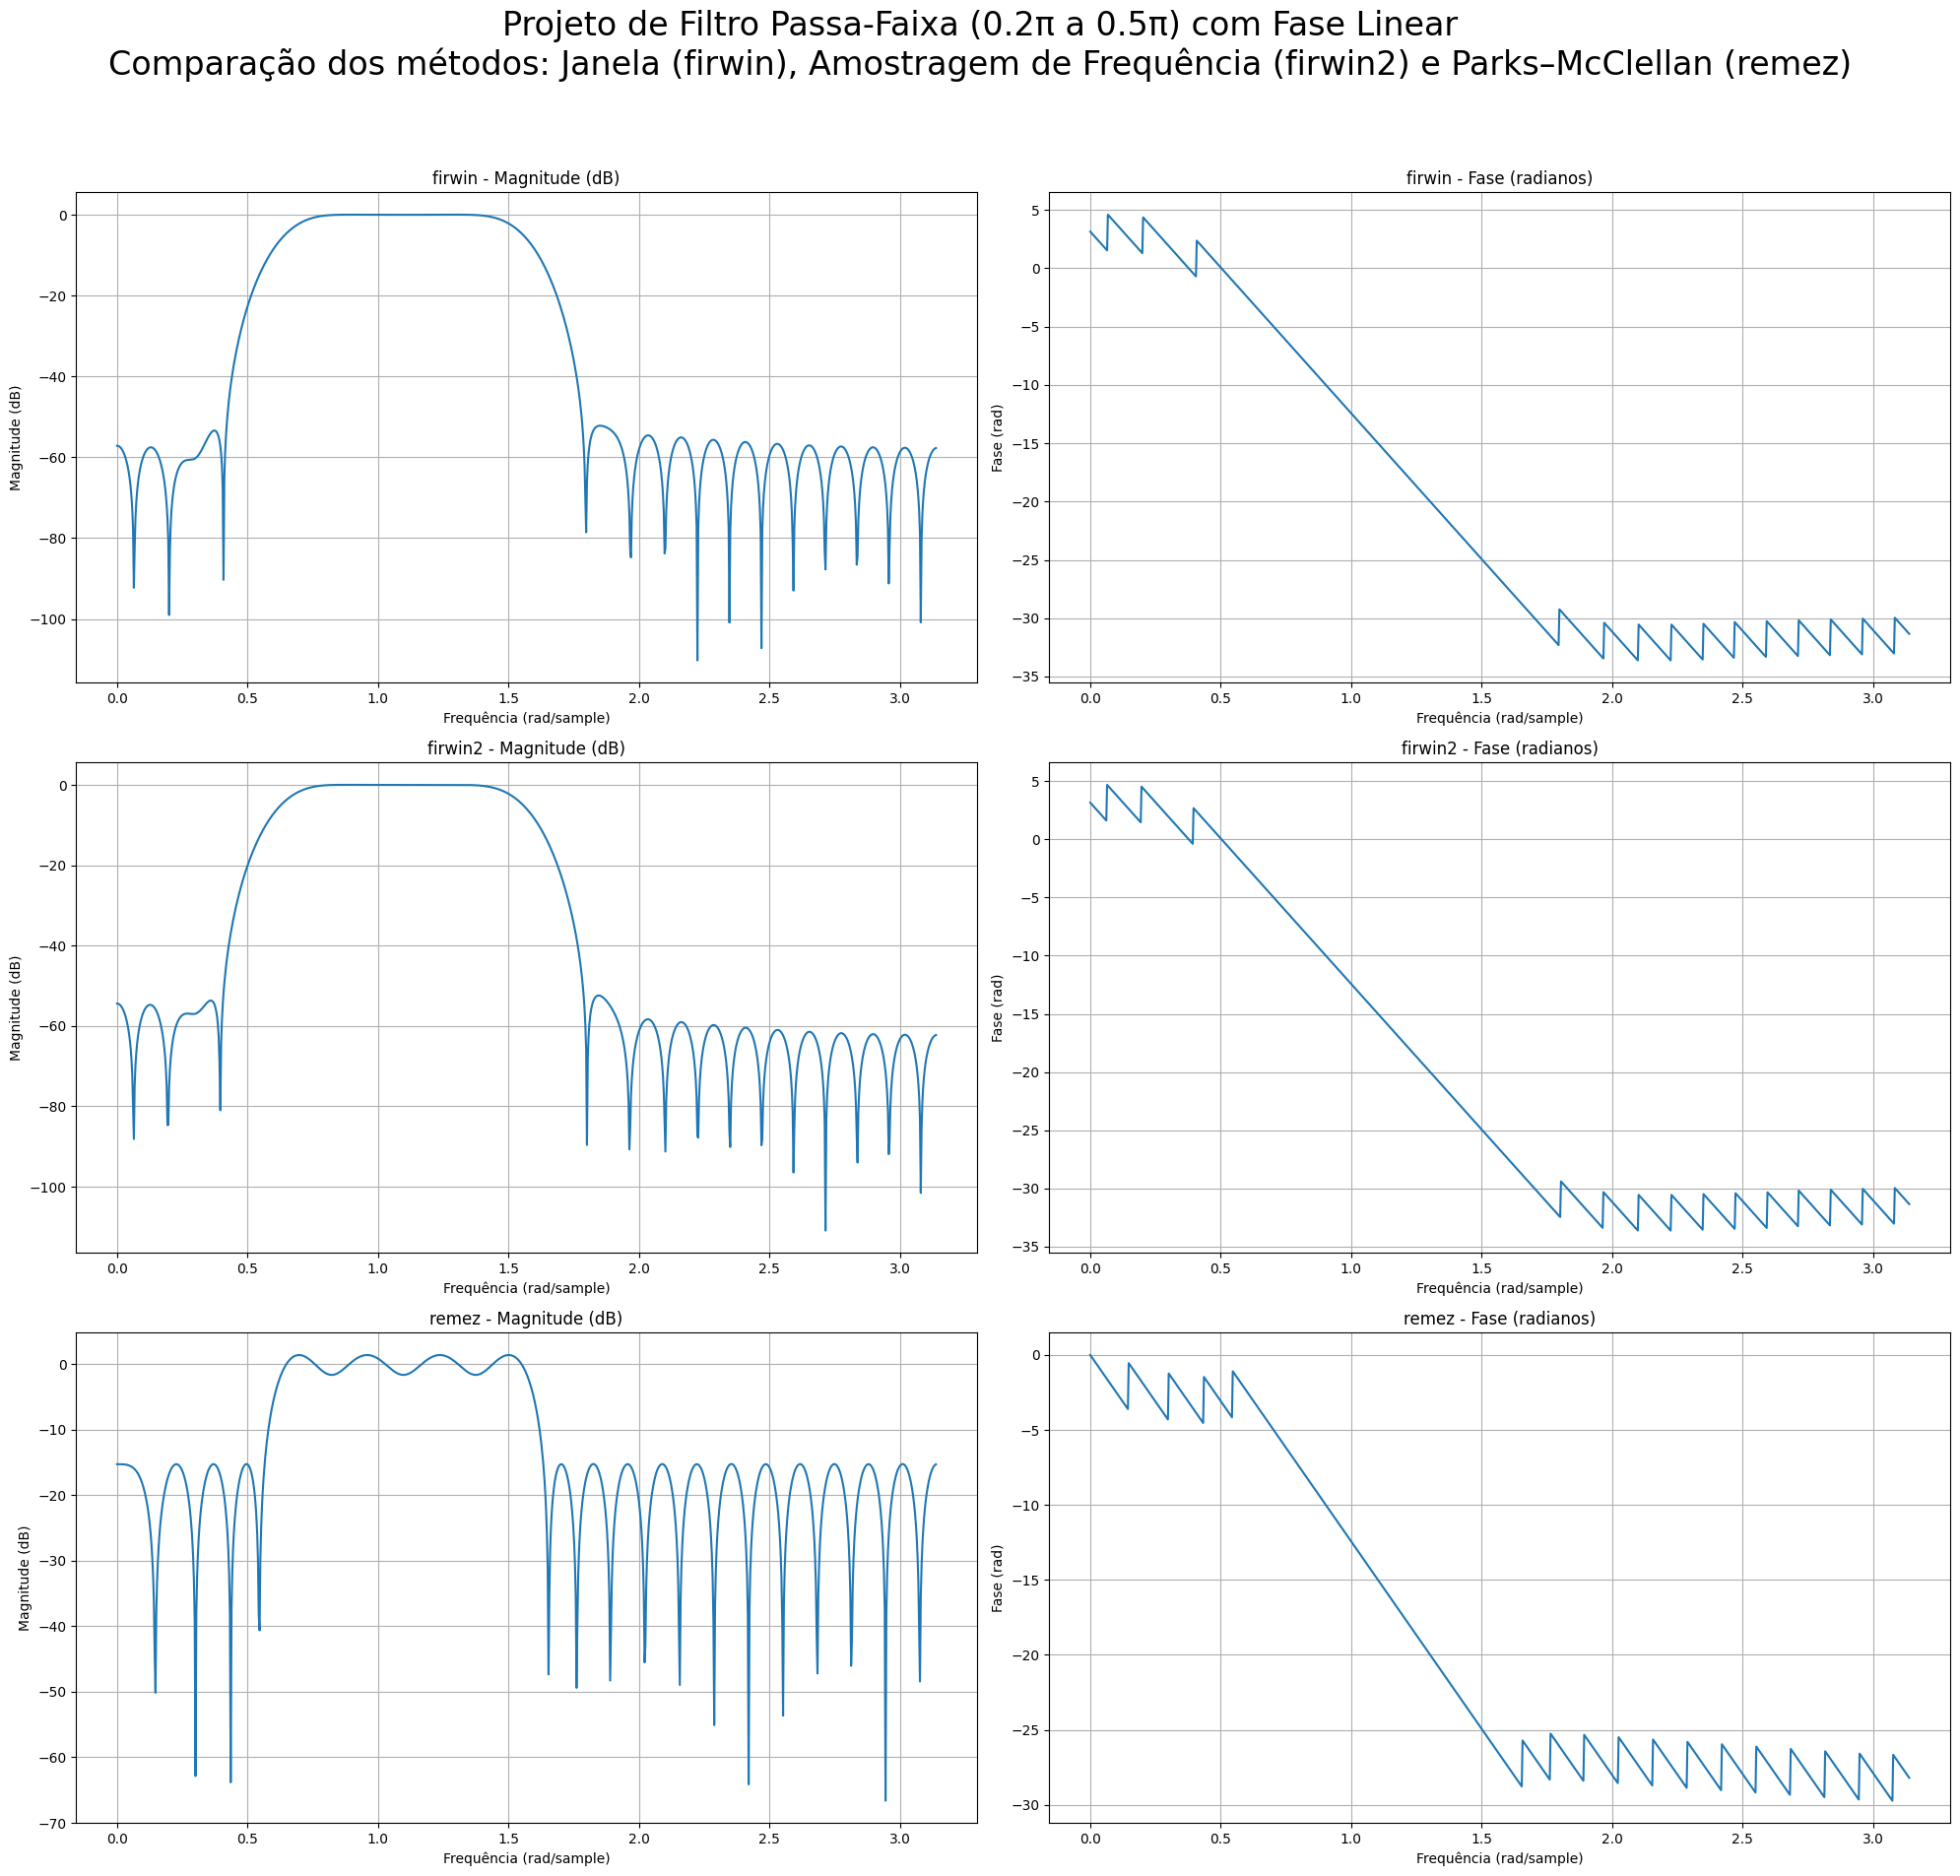

In [79]:

# Definições iniciais
fs = 2 * np.pi       # Frequência de amostragem (usamos radianos; Nyquist = π)
numtaps = 51         # Tamanho do filtro (número de coeficientes); escolha ímpar para garantir simetria

# =============================================================================
# Método 1: Projeto pelo método da janela (usando firwin)
# =============================================================================
# Para um filtro passa-faixa, usamos pass_zero=False e especificamos os cortes.
# Como fs=2π, as frequências de corte são dadas em radianos: 
#   0.2π para o início da banda de passagem e 0.5π para o final.
bp1 = firwin(numtaps, [0.2 * np.pi, 0.5 * np.pi], pass_zero=False, fs=fs, window='hamming')

# =============================================================================
# Método 2: Projeto por amostragem de frequência (usando firwin2)
# =============================================================================
# No método de amostragem de frequência definimos um vetor de frequências (em rad)
# e um vetor de ganhos desejados nesses pontos.
# Queremos: 0 para ω de 0 até 0.2π, 1 entre 0.2π e 0.5π e 0 de 0.5π até π.
f_points = np.array([0, 0.2 * np.pi, 0.2 * np.pi, 0.5 * np.pi, 0.5 * np.pi, np.pi])
amps = np.array([0, 0, 1, 1, 0, 0])
bp2 = firwin2(numtaps, f_points, amps, fs=fs)

# =============================================================================
# Método 3: Projeto pelo algoritmo Parks–McClellan (usando remez)
# =============================================================================
# Para remez, definimos as bandas e os valores desejados para cada banda.
# Aqui temos três bandas: 
#   - de 0 a 0.2π (stopband, valor 0)
#   - de 0.2π a 0.5π (passband, valor 1)
#   - de 0.5π a π (stopband, valor 0)
bands = [0, 0.18*np.pi, 0.2*np.pi, 0.5*np.pi, 0.52*np.pi, np.pi]
desired = [0, 1, 0]
# Usamos pesos iguais; remez produzirá um filtro linearmente faseado se o número de taps for ímpar.
bp3 = remez(numtaps, bands, desired, weight=[1, 1, 1], fs=fs)

# =============================================================================
# Cálculo das respostas em frequência
# =============================================================================
# Usamos freqz para calcular as respostas em frequência (com 1024 pontos para boa resolução)
w1, H1 = freqz(bp1, worN=1024, fs=fs)
w2, H2 = freqz(bp2, worN=1024, fs=fs)
w3, H3 = freqz(bp3, worN=1024, fs=fs)

# =============================================================================
# Plot dos resultados (magnitude e fase) para os 3 métodos em uma única figura
# =============================================================================
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Projeto de Filtro Passa-Faixa (0.2π a 0.5π) com Fase Linear\n'
             'Comparação dos métodos: Janela (firwin), Amostragem de Frequência (firwin2) e Parks–McClellan (remez)',
             fontsize=24)

# Método 1: Janela (firwin)
axs[0, 0].plot(w1, 20 * np.log10(np.maximum(np.abs(H1), 1e-6)))  # magnitude (em dB)
axs[0, 0].set_title('firwin - Magnitude (dB)')
axs[0, 0].set_xlabel('Frequência (rad/sample)')
axs[0, 0].set_ylabel('Magnitude (dB)')
axs[0, 0].grid(True)

axs[0, 1].plot(w1, np.unwrap(np.angle(H1)))  # fase (em radianos)
axs[0, 1].set_title('firwin - Fase (radianos)')
axs[0, 1].set_xlabel('Frequência (rad/sample)')
axs[0, 1].set_ylabel('Fase (rad)')
axs[0, 1].grid(True)

# Método 2: Amostragem de Frequência (firwin2)
axs[1, 0].plot(w2, 20 * np.log10(np.maximum(np.abs(H2), 1e-6)))
axs[1, 0].set_title('firwin2 - Magnitude (dB)')
axs[1, 0].set_xlabel('Frequência (rad/sample)')
axs[1, 0].set_ylabel('Magnitude (dB)')
axs[1, 0].grid(True)

axs[1, 1].plot(w2, np.unwrap(np.angle(H2)))
axs[1, 1].set_title('firwin2 - Fase (radianos)')
axs[1, 1].set_xlabel('Frequência (rad/sample)')
axs[1, 1].set_ylabel('Fase (rad)')
axs[1, 1].grid(True)

# Método 3: Parks–McClellan (remez)
axs[2, 0].plot(w3, 20 * np.log10(np.maximum(np.abs(H3), 1e-6)))
axs[2, 0].set_title('remez - Magnitude (dB)')
axs[2, 0].set_xlabel('Frequência (rad/sample)')
axs[2, 0].set_ylabel('Magnitude (dB)')
axs[2, 0].grid(True)

axs[2, 1].plot(w3, np.unwrap(np.angle(H3)))
axs[2, 1].set_title('remez - Fase (radianos)')
axs[2, 1].set_xlabel('Frequência (rad/sample)')
axs[2, 1].set_ylabel('Fase (rad)')
axs[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<StemContainer object of 3 artists>

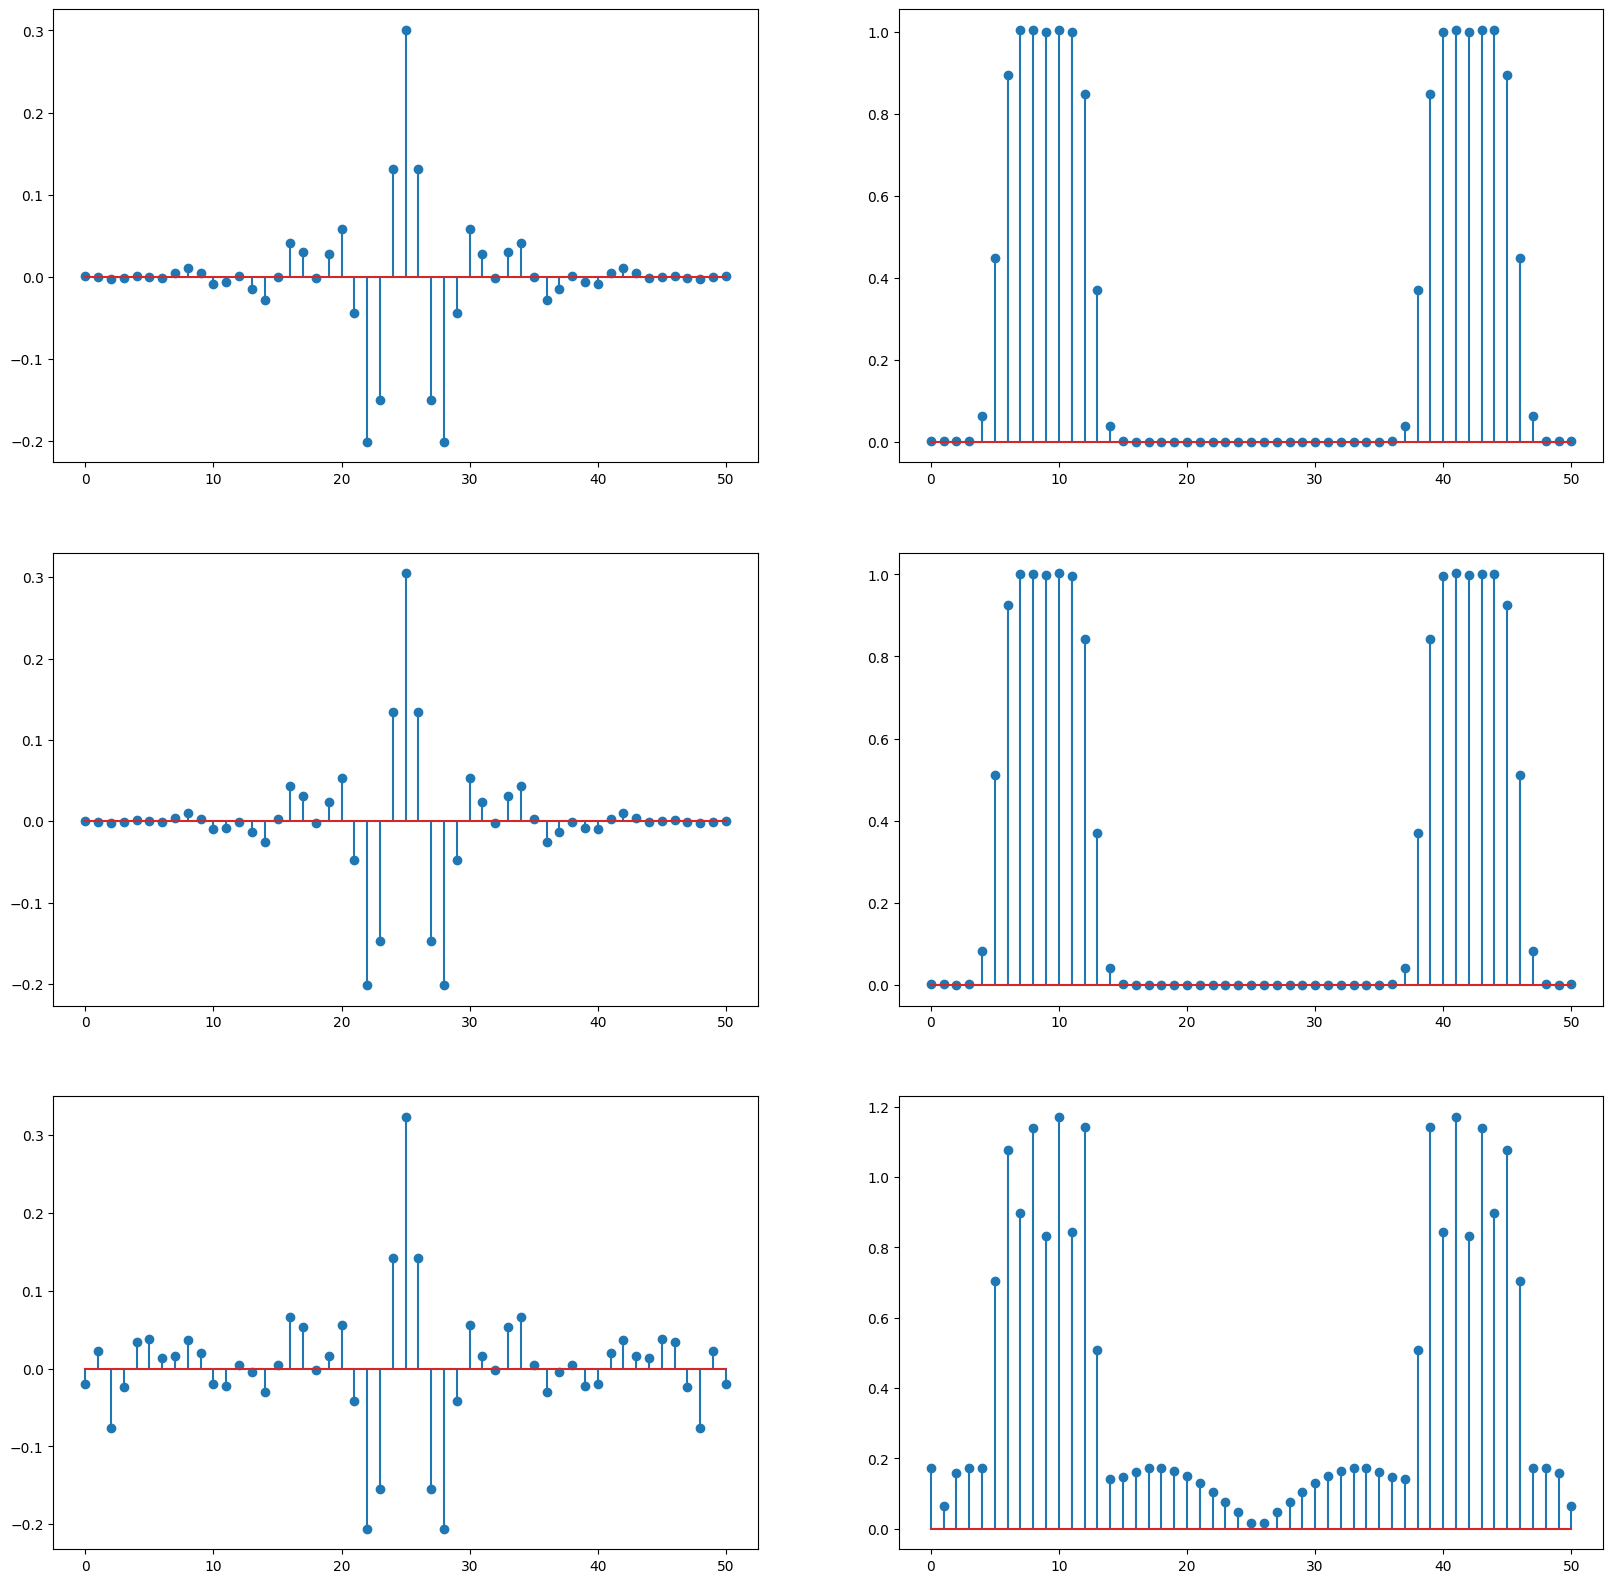

In [81]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.stem(bp1)

plt.subplot(322)
plt.stem(np.abs(np.fft.fft(bp1)))

plt.subplot(323)
plt.stem(bp2)

plt.subplot(324)
plt.stem(np.abs(np.fft.fft(bp2)))

plt.subplot(325)
plt.stem(bp3)

plt.subplot(326)
plt.stem(np.abs(np.fft.fft(bp3)))